In [19]:
! pip install numpy requests matplotlib

Looking in indexes: https://mirrors.aliyun.com/pypi/simple


Data: {"signature_name": "serving_default", "instances": ...  [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]]]]}


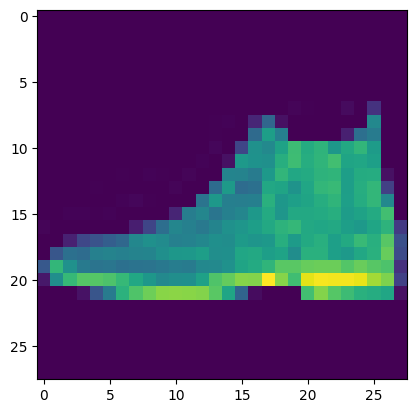

In [20]:
import json,numpy
import matplotlib.pyplot as plt
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
images = [[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.011764705882352941], [0.00392156862745098], [0.0], [0.0], [0.027450980392156862], [0.0], [0.1450980392156863], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.00392156862745098], [0.00784313725490196], [0.0], [0.10588235294117647], [0.32941176470588235], [0.043137254901960784], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.4666666666666667], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.00392156862745098], [0.0], [0.0], [0.34509803921568627], [0.5607843137254902], [0.43137254901960786], [0.0], [0.0], [0.0], [0.0], [0.08627450980392157], [0.36470588235294116], [0.41568627450980394], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.01568627450980392], [0.0], [0.20784313725490197], [0.5058823529411764], [0.47058823529411764], [0.5764705882352941], [0.6862745098039216], [0.615686274509804], [0.6509803921568628], [0.5294117647058824], [0.6039215686274509], [0.6588235294117647], [0.5490196078431373], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.00784313725490196], [0.0], [0.043137254901960784], [0.5372549019607843], [0.5098039215686274], [0.5019607843137255], [0.6274509803921569], [0.6901960784313725], [0.6235294117647059], [0.6549019607843137], [0.6980392156862745], [0.5843137254901961], [0.592156862745098], [0.5647058823529412], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.00392156862745098], [0.0], [0.00784313725490196], [0.00392156862745098], [0.0], [0.011764705882352941], [0.0], [0.0], [0.45098039215686275], [0.4470588235294118], [0.41568627450980394], [0.5372549019607843], [0.6588235294117647], [0.6], [0.611764705882353], [0.6470588235294118], [0.6549019607843137], [0.5607843137254902], [0.615686274509804], [0.6196078431372549], [0.043137254901960784], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.00392156862745098], [0.0], [0.0], [0.0], [0.0], [0.0], [0.011764705882352941], [0.0], [0.0], [0.34901960784313724], [0.5450980392156862], [0.35294117647058826], [0.3686274509803922], [0.6], [0.5843137254901961], [0.5137254901960784], [0.592156862745098], [0.6627450980392157], [0.6745098039215687], [0.5607843137254902], [0.6235294117647059], [0.6627450980392157], [0.18823529411764706], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.00784313725490196], [0.01568627450980392], [0.00392156862745098], [0.0], [0.0], [0.0], [0.3843137254901961], [0.5333333333333333], [0.43137254901960786], [0.42745098039215684], [0.43137254901960786], [0.6352941176470588], [0.5294117647058824], [0.5647058823529412], [0.5843137254901961], [0.6235294117647059], [0.6549019607843137], [0.5647058823529412], [0.6196078431372549], [0.6627450980392157], [0.4666666666666667], [0.0]], [[0.0], [0.0], [0.00784313725490196], [0.00784313725490196], [0.00392156862745098], [0.00784313725490196], [0.0], [0.0], [0.0], [0.0], [0.10196078431372549], [0.4235294117647059], [0.4588235294117647], [0.38823529411764707], [0.43529411764705883], [0.4588235294117647], [0.5333333333333333], [0.611764705882353], [0.5254901960784314], [0.6039215686274509], [0.6039215686274509], [0.611764705882353], [0.6274509803921569], [0.5529411764705883], [0.5764705882352941], [0.611764705882353], [0.6980392156862745], [0.0]], [[0.011764705882352941], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.08235294117647059], [0.20784313725490197], [0.3607843137254902], [0.4588235294117647], [0.43529411764705883], [0.403921568627451], [0.45098039215686275], [0.5058823529411764], [0.5254901960784314], [0.5607843137254902], [0.6039215686274509], [0.6470588235294118], [0.6666666666666666], [0.6039215686274509], [0.592156862745098], [0.6039215686274509], [0.5607843137254902], [0.5411764705882353], [0.5882352941176471], [0.6470588235294118], [0.16862745098039217]], [[0.0], [0.0], [0.09019607843137255], [0.21176470588235294], [0.2549019607843137], [0.2980392156862745], [0.3333333333333333], [0.4627450980392157], [0.5019607843137255], [0.4823529411764706], [0.43529411764705883], [0.44313725490196076], [0.4627450980392157], [0.4980392156862745], [0.49019607843137253], [0.5450980392156862], [0.5215686274509804], [0.5333333333333333], [0.6274509803921569], [0.5490196078431373], [0.6078431372549019], [0.6313725490196078], [0.5647058823529412], [0.6078431372549019], [0.6745098039215687], [0.6313725490196078], [0.7411764705882353], [0.24313725490196078]], [[0.0], [0.26666666666666666], [0.3686274509803922], [0.35294117647058826], [0.43529411764705883], [0.4470588235294118], [0.43529411764705883], [0.4470588235294118], [0.45098039215686275], [0.4980392156862745], [0.5294117647058824], [0.5333333333333333], [0.5607843137254902], [0.49411764705882355], [0.4980392156862745], [0.592156862745098], [0.6039215686274509], [0.5607843137254902], [0.5803921568627451], [0.49019607843137253], [0.6352941176470588], [0.6352941176470588], [0.5647058823529412], [0.5411764705882353], [0.6], [0.6352941176470588], [0.7686274509803922], [0.22745098039215686]], [[0.27450980392156865], [0.6627450980392157], [0.5058823529411764], [0.40784313725490196], [0.3843137254901961], [0.39215686274509803], [0.3686274509803922], [0.3803921568627451], [0.3843137254901961], [0.4], [0.4235294117647059], [0.41568627450980394], [0.4666666666666667], [0.47058823529411764], [0.5058823529411764], [0.5843137254901961], [0.611764705882353], [0.6549019607843137], [0.7450980392156863], [0.7450980392156863], [0.7686274509803922], [0.7764705882352941], [0.7764705882352941], [0.7333333333333333], [0.7725490196078432], [0.7411764705882353], [0.7215686274509804], [0.1411764705882353]], [[0.06274509803921569], [0.49411764705882355], [0.6705882352941176], [0.7372549019607844], [0.7372549019607844], [0.7215686274509804], [0.6705882352941176], [0.6], [0.5294117647058824], [0.47058823529411764], [0.49411764705882355], [0.4980392156862745], [0.5725490196078431], [0.7254901960784313], [0.7647058823529411], [0.8196078431372549], [0.8156862745098039], [1.0], [0.8196078431372549], [0.6941176470588235], [0.9607843137254902], [0.9882352941176471], [0.984313725490196], [0.984313725490196], [0.9686274509803922], [0.8627450980392157], [0.807843137254902], [0.19215686274509805]], [[0.0], [0.0], [0.0], [0.047058823529411764], [0.2627450980392157], [0.41568627450980394], [0.6431372549019608], [0.7254901960784313], [0.7803921568627451], [0.8235294117647058], [0.8274509803921568], [0.8235294117647058], [0.8156862745098039], [0.7450980392156863], [0.5882352941176471], [0.3215686274509804], [0.03137254901960784], [0.0], [0.0], [0.0], [0.6980392156862745], [0.8156862745098039], [0.7372549019607844], [0.6862745098039216], [0.6352941176470588], [0.6196078431372549], [0.592156862745098], [0.043137254901960784]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]]], [[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.050980392156862744], [0.2627450980392157], [0.0], [0.0], [0.0], [0.0], [0.19607843137254902], [0.14901960784313725], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.03137254901960784], [0.47058823529411764], [0.8196078431372549], [0.8862745098039215], [0.9686274509803922], [0.9294117647058824], [1.0], [1.0], [1.0], [0.9686274509803922], [0.9333333333333333], [0.9215686274509803], [0.6745098039215687], [0.2823529411764706], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.5372549019607843], [0.9372549019607843], [0.9882352941176471], [0.9529411764705882], [0.9176470588235294], [0.8980392156862745], [0.9333333333333333], [0.9568627450980393], [0.9647058823529412], [0.9411764705882353], [0.9019607843137255], [0.9098039215686274], [0.9372549019607843], [0.9725490196078431], [0.984313725490196], [0.7607843137254902], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.4], [1.0], [0.9058823529411765], [0.8941176470588236], [0.8901960784313725], [0.8941176470588236], [0.9137254901960784], [0.9019607843137255], [0.9019607843137255], [0.8980392156862745], [0.8941176470588236], [0.9098039215686274], [0.9098039215686274], [0.9058823529411765], [0.8901960784313725], [0.8784313725490196], [0.9882352941176471], [0.7019607843137254], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.9137254901960784], [0.9450980392156862], [0.8980392156862745], [0.9058823529411765], [1.0], [1.0], [0.9333333333333333], [0.9058823529411765], [0.8901960784313725], [0.9333333333333333], [0.9647058823529412], [0.8941176470588236], [0.9019607843137255], [0.8901960784313725], [0.9176470588235294], [0.9215686274509803], [0.8980392156862745], [0.9450980392156862], [0.0784313725490196], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.9725490196078431], [0.9450980392156862], [0.9058823529411765], [1.0], [0.5843137254901961], [0.1843137254901961], [0.9882352941176471], [0.8941176470588236], [1.0], [0.9490196078431372], [0.8470588235294118], [0.9333333333333333], [0.9098039215686274], [1.0], [0.8941176470588236], [0.8627450980392157], [0.9176470588235294], [0.9803921568627451], [0.21176470588235294], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [1.0], [0.9411764705882353], [0.9098039215686274], [1.0], [0.058823529411764705], [0.0], [1.0], [0.9294117647058824], [0.7490196078431373], [0.0], [0.0], [0.8392156862745098], [1.0], [0.050980392156862744], [0.4823529411764706], [1.0], [0.9176470588235294], [0.9882352941176471], [0.4470588235294118], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.023529411764705882], [1.0], [0.9333333333333333], [0.9372549019607843], [1.0], [0.6941176470588235], [0.0], [1.0], [1.0], [0.0], [0.5098039215686274], [0.4549019607843137], [0.1843137254901961], [0.2549019607843137], [0.16862745098039217], [0.1450980392156863], [1.0], [0.9254901960784314], [0.9764705882352941], [0.6352941176470588], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.12549019607843137], [1.0], [0.9254901960784314], [0.9607843137254902], [1.0], [0.8], [0.0], [1.0], [0.32941176470588235], [0.0], [0.1450980392156863], [0.10980392156862745], [0.12156862745098039], [0.0], [0.09803921568627451], [0.050980392156862744], [1.0], [0.9254901960784314], [0.9764705882352941], [0.7803921568627451], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.20784313725490197], [1.0], [0.9254901960784314], [0.9803921568627451], [0.9803921568627451], [0.9058823529411765], [0.00784313725490196], [1.0], [0.08235294117647059], [0.0], [0.8666666666666667], [1.0], [0.9254901960784314], [0.21176470588235294], [0.9607843137254902], [0.7764705882352941], [0.9529411764705882], [0.9333333333333333], [0.9607843137254902], [0.8745098039215686], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.3137254901960784], [1.0], [0.9294117647058824], [0.9803921568627451], [0.9411764705882353], [1.0], [0.0], [0.0], [0.15294117647058825], [0.615686274509804], [0.0], [0.0], [0.8431372549019608], [0.3686274509803922], [0.0784313725490196], [0.49411764705882355], [1.0], [0.9294117647058824], [0.9372549019607843], [0.9803921568627451], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.396078431372549], [1.0], [0.9215686274509803], [0.9921568627450981], [0.9568627450980393], [0.9529411764705882], [0.5215686274509804], [0.5411764705882353], [0.8156862745098039], [1.0], [0.788235294117647], [0.8392156862745098], [1.0], [0.9019607843137255], [0.027450980392156862], [0.6823529411764706], [1.0], [0.9411764705882353], [0.9333333333333333], [1.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.49411764705882355], [1.0], [0.9137254901960784], [1.0], [0.9725490196078431], [0.9137254901960784], [1.0], [1.0], [0.9411764705882353], [0.9098039215686274], [0.9529411764705882], [0.9529411764705882], [0.9058823529411765], [0.984313725490196], [1.0], [1.0], [0.996078431372549], [0.9529411764705882], [0.9333333333333333], [1.0], [0.011764705882352941], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.5764705882352941], [1.0], [0.9137254901960784], [0.9764705882352941], [0.7098039215686275], [0.9529411764705882], [0.8901960784313725], [0.8784313725490196], [0.9019607843137255], [0.9176470588235294], [0.9019607843137255], [0.9019607843137255], [0.9215686274509803], [0.8941176470588236], [0.9215686274509803], [0.8705882352941177], [0.8117647058823529], [1.0], [0.9254901960784314], [1.0], [0.13725490196078433], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.6392156862745098], [1.0], [0.9607843137254902], [0.8666666666666667], [0.33725490196078434], [1.0], [0.9137254901960784], [0.9137254901960784], [0.9215686274509803], [0.9254901960784314], [0.9176470588235294], [0.9176470588235294], [0.9176470588235294], [0.9098039215686274], [0.9490196078431372], [0.9058823529411765], [0.49019607843137253], [1.0], [0.9254901960784314], [1.0], [0.21568627450980393], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.7098039215686275], [0.996078431372549], [1.0], [0.7843137254901961], [0.27058823529411763], [1.0], [0.8941176470588236], [0.9098039215686274], [0.9176470588235294], [0.9215686274509803], [0.9176470588235294], [0.9176470588235294], [0.9137254901960784], [0.9215686274509803], [0.9450980392156862], [0.9294117647058824], [0.27450980392156865], [1.0], [0.9215686274509803], [0.9647058823529412], [0.2235294117647059], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.7725490196078432], [0.9686274509803922], [1.0], [0.7372549019607844], [0.43137254901960786], [1.0], [0.8784313725490196], [0.9137254901960784], [0.9176470588235294], [0.9176470588235294], [0.9176470588235294], [0.9176470588235294], [0.9176470588235294], [0.9176470588235294], [0.9411764705882353], [0.9921568627450981], [0.27058823529411763], [1.0], [0.9254901960784314], [0.9725490196078431], [0.30196078431372547], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.7843137254901961], [0.9647058823529412], [1.0], [0.5843137254901961], [0.5686274509803921], [1.0], [0.8745098039215686], [0.9215686274509803], [0.9176470588235294], [0.9215686274509803], [0.9215686274509803], [0.9215686274509803], [0.9176470588235294], [0.9294117647058824], [0.9137254901960784], [1.0], [0.1843137254901961], [1.0], [0.9372549019607843], [0.9764705882352941], [0.3843137254901961], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.8], [0.9529411764705882], [1.0], [0.43529411764705883], [0.6784313725490196], [1.0], [0.8901960784313725], [0.9215686274509803], [0.9215686274509803], [0.9254901960784314], [0.9215686274509803], [0.9215686274509803], [0.9215686274509803], [0.9372549019607843], [0.8980392156862745], [1.0], [0.07450980392156863], [0.8901960784313725], [0.9647058823529412], [0.9764705882352941], [0.43137254901960786], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.7686274509803922], [0.9411764705882353], [1.0], [0.42745098039215684], [0.8352941176470589], [0.9803921568627451], [0.8980392156862745], [0.9215686274509803], [0.9215686274509803], [0.9254901960784314], [0.9215686274509803], [0.9294117647058824], [0.9254901960784314], [0.9294117647058824], [0.8862745098039215], [1.0], [0.21568627450980393], [0.796078431372549], [0.984313725490196], [0.9607843137254902], [0.47058823529411764], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.7529411764705882], [0.9529411764705882], [1.0], [0.4470588235294118], [0.9098039215686274], [0.9411764705882353], [0.9098039215686274], [0.9215686274509803], [0.9215686274509803], [0.9254901960784314], [0.9176470588235294], [0.9294117647058824], [0.9254901960784314], [0.9215686274509803], [0.8980392156862745], [1.0], [0.5254901960784314], [0.6705882352941176], [0.9882352941176471], [0.9568627450980393], [0.5372549019607843], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.7411764705882353], [0.984313725490196], [1.0], [0.6039215686274509], [0.9333333333333333], [0.9137254901960784], [0.9254901960784314], [0.9176470588235294], [0.9215686274509803], [0.9254901960784314], [0.9215686274509803], [0.9333333333333333], [0.9254901960784314], [0.9215686274509803], [0.9098039215686274], [1.0], [0.6509803921568628], [0.49019607843137253], [1.0], [0.9529411764705882], [0.5568627450980392], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.7176470588235294], [0.9882352941176471], [1.0], [0.6705882352941176], [0.9686274509803922], [0.9098039215686274], [0.9176470588235294], [0.9176470588235294], [0.9137254901960784], [0.9137254901960784], [0.9098039215686274], [0.9176470588235294], [0.9137254901960784], [0.9176470588235294], [0.9137254901960784], [0.9411764705882353], [0.8745098039215686], [0.5019607843137255], [1.0], [0.9490196078431372], [0.592156862745098], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.6980392156862745], [0.9529411764705882], [1.0], [0.2235294117647059], [0.9333333333333333], [0.9450980392156862], [0.9333333333333333], [0.9333333333333333], [0.9333333333333333], [0.9294117647058824], [0.9254901960784314], [0.9294117647058824], [0.9294117647058824], [0.9411764705882353], [0.9294117647058824], [0.996078431372549], [0.6901960784313725], [0.20392156862745098], [1.0], [0.9372549019607843], [0.615686274509804], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.7372549019607844], [0.9411764705882353], [0.9803921568627451], [0.24313725490196078], [0.8549019607843137], [1.0], [0.8627450980392157], [0.8705882352941177], [0.8705882352941177], [0.8705882352941177], [0.8745098039215686], [0.8745098039215686], [0.8784313725490196], [0.8705882352941177], [0.8549019607843137], [1.0], [0.6039215686274509], [0.12549019607843137], [1.0], [0.9254901960784314], [0.7372549019607844], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.5098039215686274], [0.9607843137254902], [0.9490196078431372], [0.09411764705882353], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.13333333333333333], [0.9490196078431372], [0.9568627450980393], [0.5294117647058824], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.2980392156862745], [1.0], [0.9764705882352941], [0.08627450980392157], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.15294117647058825], [0.9764705882352941], [1.0], [0.4823529411764706], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.19215686274509805], [0.803921568627451], [0.7725490196078432], [0.043137254901960784], [0.0], [0.01568627450980392], [0.00392156862745098], [0.00784313725490196], [0.00784313725490196], [0.00784313725490196], [0.00784313725490196], [0.00784313725490196], [0.00784313725490196], [0.00784313725490196], [0.00784313725490196], [0.011764705882352941], [0.0], [0.011764705882352941], [0.6823529411764706], [0.7411764705882353], [0.2627450980392157], [0.0], [0.0], [0.0]]], [[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.00392156862745098], [0.0], [0.2627450980392157], [0.6941176470588235], [0.5058823529411764], [0.6], [0.4588235294117647], [0.5058823529411764], [0.5725490196078431], [0.5529411764705883], [0.6862745098039216], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.00784313725490196], [0.0], [0.7686274509803922], [1.0], [1.0], [1.0], [0.9450980392156862], [0.984313725490196], [1.0], [0.9607843137254902], [1.0], [0.2980392156862745], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.9529411764705882], [0.9294117647058824], [0.8509803921568627], [0.8941176470588236], [0.9058823529411765], [0.8705882352941177], [0.8549019607843137], [0.8588235294117647], [1.0], [0.4549019607843137], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [1.0], [0.9215686274509803], [0.9058823529411765], [0.9137254901960784], [0.8862745098039215], [0.8823529411764706], [0.8980392156862745], [0.8705882352941177], [1.0], [0.5686274509803921], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.09019607843137255], [1.0], [0.9019607843137255], [0.8980392156862745], [0.9137254901960784], [0.8980392156862745], [0.8823529411764706], [0.8901960784313725], [0.8666666666666667], [0.9450980392156862], [0.6549019607843137], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.2627450980392157], [1.0], [0.8823529411764706], [0.9176470588235294], [0.9058823529411765], [0.8862745098039215], [0.8901960784313725], [0.8941176470588236], [0.8784313725490196], [0.9176470588235294], [0.7333333333333333], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.4470588235294118], [0.9764705882352941], [0.8509803921568627], [0.9215686274509803], [0.9333333333333333], [0.9607843137254902], [0.8901960784313725], [0.8901960784313725], [0.8823529411764706], [0.9450980392156862], [0.6901960784313725], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.6549019607843137], [0.9686274509803922], [0.8901960784313725], [0.9058823529411765], [0.9803921568627451], [0.7843137254901961], [0.9725490196078431], [0.9058823529411765], [0.8784313725490196], [0.984313725490196], [0.5764705882352941], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.8156862745098039], [0.9490196078431372], [0.8823529411764706], [0.9529411764705882], [0.8823529411764706], [0.0], [1.0], [0.9137254901960784], [0.8862745098039215], [1.0], [0.5058823529411764], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.8745098039215686], [0.9333333333333333], [0.8745098039215686], [1.0], [0.6313725490196078], [0.0], [1.0], [0.9254901960784314], [0.8745098039215686], [1.0], [0.5294117647058824], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.9607843137254902], [0.9215686274509803], [0.8705882352941177], [1.0], [0.2823529411764706], [0.0], [0.9725490196078431], [0.996078431372549], [0.8509803921568627], [1.0], [0.5686274509803921], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [1.0], [0.9137254901960784], [0.8862745098039215], [1.0], [0.027450980392156862], [0.0], [0.7490196078431373], [0.9725490196078431], [0.8627450980392157], [1.0], [0.49411764705882355], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [1.0], [0.9137254901960784], [0.9058823529411765], [0.984313725490196], [0.0], [0.0], [0.6235294117647059], [0.984313725490196], [0.8666666666666667], [1.0], [0.43529411764705883], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [1.0], [0.9098039215686274], [0.9254901960784314], [0.8470588235294118], [0.0], [0.0], [0.5137254901960784], [0.9921568627450981], [0.8627450980392157], [1.0], [0.43529411764705883], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [1.0], [0.8941176470588236], [0.9529411764705882], [0.6745098039215687], [0.0], [0.0], [0.2235294117647059], [0.9764705882352941], [0.8705882352941177], [1.0], [0.43529411764705883], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [1.0], [0.9019607843137255], [0.9568627450980393], [0.5450980392156862], [0.0], [0.0], [0.0392156862745098], [1.0], [0.8901960784313725], [1.0], [0.39215686274509803], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.8901960784313725], [0.9294117647058824], [0.9490196078431372], [0.44313725490196076], [0.0], [0.0], [0.023529411764705882], [1.0], [0.9019607843137255], [1.0], [0.34901960784313724], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.8], [0.9372549019607843], [0.9607843137254902], [0.592156862745098], [0.0], [0.0], [0.0], [1.0], [0.8901960784313725], [1.0], [0.38823529411764707], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.592156862745098], [0.9607843137254902], [0.9333333333333333], [0.7764705882352941], [0.0], [0.0], [0.0], [1.0], [0.9176470588235294], [1.0], [0.3607843137254902], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.34901960784313724], [0.9725490196078431], [0.9137254901960784], [0.9725490196078431], [0.0], [0.0], [0.0], [0.9882352941176471], [0.9294117647058824], [1.0], [0.35294117647058826], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.12156862745098039], [0.9411764705882353], [0.8980392156862745], [0.8862745098039215], [0.0], [0.0], [0.0], [0.9372549019607843], [0.9333333333333333], [1.0], [0.3607843137254902], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.8862745098039215], [0.9137254901960784], [0.9294117647058824], [0.13333333333333333], [0.0], [0.0], [0.9176470588235294], [0.9333333333333333], [1.0], [0.37254901960784315], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.9137254901960784], [0.9254901960784314], [0.9568627450980393], [0.26666666666666666], [0.0], [0.0], [0.8196078431372549], [0.9450980392156862], [0.9294117647058824], [0.3843137254901961], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.00392156862745098], [0.0], [0.596078431372549], [0.9490196078431372], [0.9607843137254902], [0.5019607843137255], [0.0], [0.0], [0.7764705882352941], [0.9450980392156862], [0.9333333333333333], [0.3176470588235294], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.00784313725490196], [0.0], [0.28627450980392155], [0.9647058823529412], [0.9450980392156862], [0.8274509803921568], [0.0], [0.0], [0.792156862745098], [0.9411764705882353], [0.9294117647058824], [0.2901960784313726], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.01568627450980392], [0.0], [0.0], [0.8980392156862745], [0.9254901960784314], [0.8196078431372549], [0.0], [0.0], [0.6196078431372549], [0.9686274509803922], [0.9333333333333333], [0.38823529411764707], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.00392156862745098], [0.0], [0.0], [0.7803921568627451], [1.0], [0.9686274509803922], [0.22745098039215686], [0.0], [0.6313725490196078], [1.0], [0.9882352941176471], [0.4666666666666667], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.3843137254901961], [0.6235294117647059], [0.2784313725490196], [0.0], [0.0], [0.26666666666666666], [0.6901960784313725], [0.6431372549019608], [0.22745098039215686], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]]]]
images = numpy.array(images)

image = images[0]
plt.figure()
plt.imshow(image)

data = json.dumps({"signature_name": "serving_default", "instances": images[0:3].tolist()})
print('Data: {} ... {}'.format(data[:50], data[len(data)-52:]))

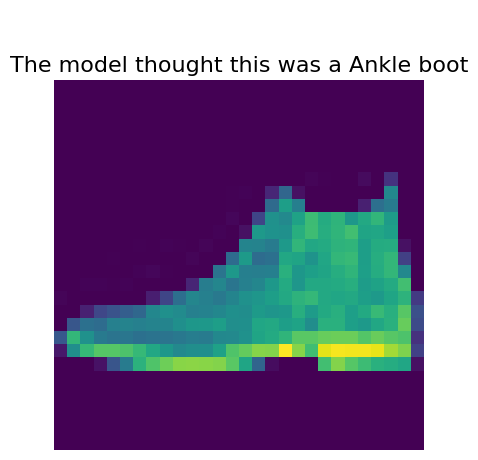

In [21]:
import requests
import matplotlib.pyplot as plt
headers = {"content-type": "application/json"}
json_response = requests.post('http://mnist-202208011.service:8501/v1/models/mnist:predict', data=data, headers=headers)
predictions = json.loads(json_response.text)['predictions']

def show(idx, title):
  plt.figure()
  plt.imshow(images[idx].reshape(28,28))
  plt.axis('off')
  plt.title('\n\n{}'.format(title), fontdict={'size': 16})

show(0, 'The model thought this was a {}'.format(class_names[numpy.argmax(predictions[0])]))